In [162]:
%matplotlib inline 
from pycocotools.coco import COCO
import numpy as np 
import skimage.io as io 
import matplotlib.pyplot as plt
import pylab
import os
from PIL import Image, ExifTags
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [209]:
import random
import json

def get_random_element(my_list):
    if len(my_list) == 0:
        return None
    else:
        return random.choice(my_list)

def open_json(json_path): 

    with open(json_path, 'r') as json_file: 
        data = json.load(json_file)
        
    return data

def save_json(destination_path, data):
    try:
        with open(destination_path, 'w') as file:
            json.dump(data, file)
        print(f"JSON file saved successfully at '{destination_path}'")
    except IOError:
        print(f"Error saving JSON file at '{destination_path}'")

In [143]:
dataDir = "./data"
annFile = "{}/swapped_annotations.json".format(dataDir)

In [144]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [145]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n {}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n {}'.format(' '.join(nms)))

COCO categories: 
 Other Bottle Bottle cap Can Cup Lid Plastic bag + wrapper Pop tab Straw Cigarette

COCO supercategories: 
 Litter


In [153]:
catIds = coco.getCatIds(catNms=['Bottle']); 
imgIds = coco.getImgIds(catIds=catIds); 
print(imgIds)
randomImg = get_random_element(imgIds)
img = coco.loadImgs(randomImg)[0]

[0, 2, 3, 5, 7, 8, 10, 12, 13, 14, 15, 23, 25, 26, 27, 28, 36, 37, 39, 40, 43, 60, 75, 76, 84, 89, 99, 101, 102, 103, 104, 106, 111, 112, 113, 114, 115, 116, 122, 124, 130, 148, 176, 182, 187, 188, 192, 194, 198, 220, 222, 227, 229, 235, 237, 271, 276, 291, 295, 296, 299, 300, 301, 313, 314, 320, 322, 325, 330, 334, 335, 339, 344, 346, 348, 358, 360, 362, 369, 380, 385, 389, 391, 394, 395, 410, 414, 427, 429, 435, 437, 440, 443, 444, 460, 468, 487, 493, 494, 496, 507, 508, 514, 516, 520, 522, 524, 526, 538, 539, 540, 543, 549, 578, 580, 582, 595, 597, 604, 605, 616, 618, 619, 620, 650, 651, 654, 657, 658, 663, 672, 673, 679, 685, 686, 687, 700, 701, 706, 707, 714, 716, 717, 724, 729, 751, 753, 755, 758, 764, 765, 782, 783, 784, 789, 793, 794, 803, 830, 840, 849, 853, 855, 860, 866, 875, 962, 964, 965, 974, 975, 995, 996, 999, 1000, 1008, 1010, 1013, 1019, 1022, 1025, 1044, 1045, 1063, 1067, 1077, 1078, 1079, 1080, 1081, 1082, 1084, 1088, 1091, 1094, 1096, 1097, 1099, 1101, 1102, 1103, 

## EXIF 

There are certain info encoded in the image that determine orientation of the image. 

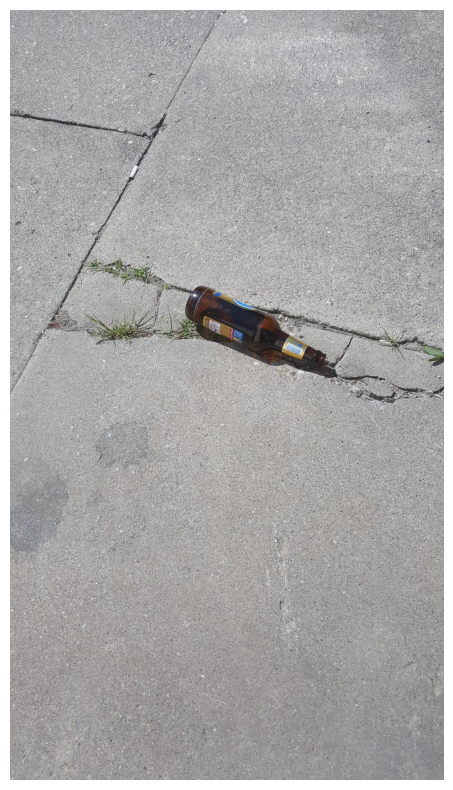

In [167]:
# load and display image 
I = Image.open("{}/{}".format(dataDir, img['file_name']))

# Obtain Exif orientation tag code
for orientation in ExifTags.TAGS.keys():
    if ExifTags.TAGS[orientation] == 'Orientation':
        break
        
 # Load and process image metadata
if I._getexif():
    exif = dict(I._getexif().items())
    # Rotate portrait and upside down images if necessary
    if orientation in exif:
        if exif[orientation] == 3:
            I = I.rotate(180,expand=True)
        if exif[orientation] == 6:
            I = I.rotate(270,expand=True)
        if exif[orientation] == 8:
            I = I.rotate(90,expand=True)

plt.axis('off')
plt.imshow(I)
plt.show()

{'id': 917, 'image_id': 299, 'category_id': 1, 'segmentation': [[1370.0, 1913.0, 1795.0, 2107.0, 1833.0, 2136.0, 1849.0, 2164.0, 1873.0, 2212.0, 2110.0, 2346.0, 2128.0, 2344.0, 2160.0, 2374.0, 2172.0, 2372.0, 2181.0, 2391.0, 2161.0, 2433.0, 2131.0, 2464.0, 2124.0, 2453.0, 2097.0, 2452.0, 2074.0, 2443.0, 2049.0, 2428.0, 1819.0, 2347.0, 1771.0, 2353.0, 1708.0, 2361.0, 1674.0, 2351.0, 1504.0, 2270.0, 1254.0, 2149.0, 1217.0, 2122.0, 1204.0, 2082.0, 1213.0, 2028.0, 1242.0, 1964.0, 1272.0, 1920.0, 1311.0, 1899.0]], 'area': 213248.5, 'bbox': [1204.0, 1899.0, 977.0, 565.0], 'iscrowd': 0}


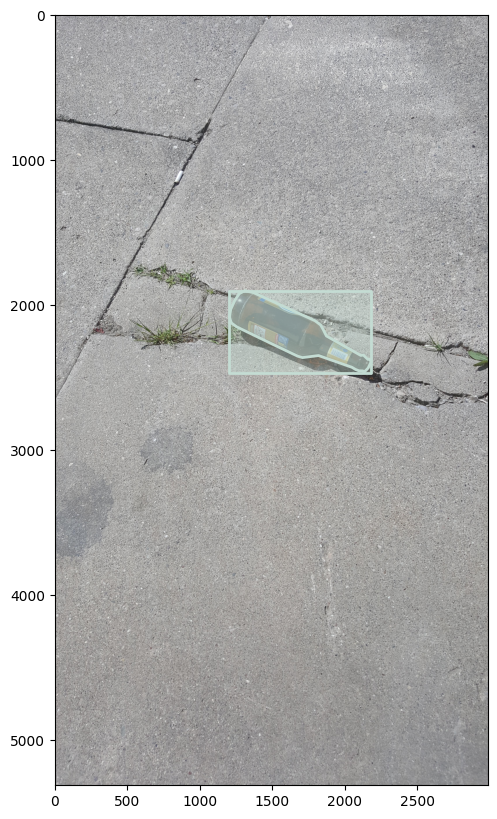

In [168]:
# Load and display instance annotations 
plt.imshow(I); 
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds) 
print(anns[0])
coco.showAnns(anns, True) 

In [215]:
src_path = "/home/zozan/Work/UTwente/TACO"
coco_json = open_json("{}/coco_annotations/instances_train2017.json".format(src_path))
taco_json = open_json("{}/data/swapped_annotations.json".format(src_path))

In [216]:
num_test = 1
print(coco_json.keys())
print(coco_json['images'][:num_test])
print(coco_json['annotations'][:num_test])
print(coco_json['categories'][:num_test])
print(taco_json.keys())
print(taco_json['images'][:num_test])
print(taco_json['annotations'][:num_test])
print(taco_json['categories'][:num_test])

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
[{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]
[{'segmentation': [[239.97, 260.24, 222.04, 270.49, 199.84, 253.41, 213.5, 227.79, 259.62, 200.46, 274.13, 202.17, 277.55, 210.71, 249.37, 253.41, 237.41, 264.51, 242.54, 261.95, 228.87, 271.34]], 'area': 2765.1486500000005, 'iscrowd': 0, 'image_id': 558840, 'bbox': [199.84, 200.46, 77.71, 70.88], 'category_id': 58, 'id': 156}]
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])
[{'id': 0, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000006.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/6553

In [233]:
for key in taco_anots.keys(): 
    print("Key: {}, len: {}".format(key, len(taco_anots[key])))
    
def split_json(json, split_percentage, save=False): 
    
    train_dict, val_dict = {}, {}
    # Save keys
    for key in json.keys(): 
        train_dict[key] = []
        val_dict[key] = []
    
    # Copy keys
    train_dict['info'] = json['info']; val_dict['info'] = json['info']
    train_dict['categories'] = json['categories']; val_dict['categories'] = json['categories']
    train_dict['licenses'] = json['licenses']; val_dict['licenses'] = json['licenses']
    
    # Split images
    for i, img in enumerate(json['images']): 
        if i < split_percentage * len(json['images']): 
            train_dict['images'].append(img)
        else: 
            val_dict['images'].append(img)
    
    # Split annotations
    atrain_ids, aval_ids = 0, 0
    for train_img in train_dict['images']: 
        for anot in json['annotations']:
            anot['id'] = atrain_ids
            atrain_ids +=1 
            if train_img['id'] == anot['image_id']: 
                train_dict['annotations'].append(anot)
                
    for val_img in val_dict['images']: 
        for anot in json['annotations']:
            anot['id'] = aval_ids  
            aval_ids += 1
            if val_img['id'] == anot['image_id']: 
                val_dict['annotations'].append(anot)
    
    # save json
    debug = True
    if debug: 
        print("Saving train_dict with img: {}, anots:{}".format(len(train_dict['images']), len(train_dict['annotations'])))
        print("Saving val_dict with img: {}, anots:{}".format(len(val_dict['images']), len(val_dict['annotations'])))
    
    if save: 
        save_json("/home/zozan/Work/UTwente/TACO/taco_train.json", train_dict)
        save_json("/home/zozan/Work/UTwente/TACO/taco_val.json", val_dict)
    

split_json(taco_json, 0.9, save=True)    

Key: info, len: 6
Key: images, len: 1500
Key: annotations, len: 4784
Key: scene_annotations, len: 4296
Key: licenses, len: 0
Key: categories, len: 10
Key: scene_categories, len: 7
Saving train_dict with img: 1350, anots:4301
Saving val_dict with img: 150, anots:483
JSON file saved successfully at '/home/zozan/Work/UTwente/TACO/taco_train.json'
JSON file saved successfully at '/home/zozan/Work/UTwente/TACO/taco_val.json'


In [234]:
# Train dict
print(taco_anots['images'][0])
print(taco_anots['annotations'][2])
print([i['name'] for i in taco_anots['categories']])

val_json = open_json("/home/zozan/Work/UTwente/TACO/taco_val.json")
train_json = open_json("/home/zozan/Work/UTwente/TACO/taco_train.json")


{'id': 0, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000006.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png', 'coco_url': None, 'date_captured': None, 'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}
{'id': 3, 'image_id': 1, 'category_id': 0, 'segmentation': [[617.0, 383.0, 703.0, 437.0, 713.0, 456.0, 725.0, 459.0, 747.0, 482.0, 760.0, 483.0, 780.0, 506.0, 794.0, 520.0, 807.0, 528.0, 827.0, 537.0, 835.0, 551.0, 852.0, 555.0, 882.0, 576.0, 913.0, 596.0, 929.0, 605.0, 954.0, 617.0, 972.0, 622.0, 998.0, 630.0, 1034.0, 640.0, 1051.0, 644.0, 1064.0, 632.0, 1081.0, 616.0, 1104.0, 589.0, 1121.0, 576.0, 1152.0, 566.0, 1177.0, 564.0, 1201.0, 569.0, 1231.0, 589.0, 1260.0, 613.0, 1277.0, 644.0, 1298.0, 669.0, 1318.0, 694.0, 1343.0, 724.0, 1362.0, 756.0, 1378.0, 779.0, 1389.0, 795.0, 1389.0, 801.0, 1398.0, 811.0, 1415.0, 821.0, 1427.0, 837.0, 1437.0, 848.0, 1450.0, 863.0, 1461.0, 872.0, 1469.0

In [238]:
def has_duplicate(my_list):
    unique_elements = set(my_list)  # Convert the list to a set to remove duplicates
    if len(my_list) != len(unique_elements):
        return True  # Duplicates exist in the list
    else:
        return False  # No duplicates found in the list
    
def print_duplicates(my_list):
    unique_elements = set()
    duplicates = set()

    for num in my_list:
        if num in unique_elements:
            duplicates.add(num)
        else:
            unique_elements.add(num)

    if duplicates:
        print("Duplicates found:", ", ".join(str(num) for num in duplicates))
    else:
        print("No duplicates found.")

print_duplicates([i['id'] for i in train_json['annotations']])
print_duplicates([i['id'] for i in val_json['annotations']])

No duplicates found.
No duplicates found.


## COCO annotation keys are: 

## Linux Cmd

In [236]:
print(train_json['annotations'])

[{'id': 712816, 'image_id': 0, 'category_id': 1, 'segmentation': [[561.0, 1238.0, 568.0, 1201.0, 567.0, 1175.0, 549.0, 1127.0, 538.0, 1089.0, 519.0, 1043.0, 517.0, 1005.0, 523.0, 964.0, 529.0, 945.0, 520.0, 896.0, 525.0, 862.0, 536.0, 821.0, 554.0, 769.0, 577.0, 727.0, 595.0, 678.0, 596.0, 585.0, 588.0, 346.0, 581.0, 328.0, 569.0, 306.0, 570.0, 276.0, 576.0, 224.0, 560.0, 205.0, 564.0, 170.0, 578.0, 154.0, 608.0, 136.0, 649.0, 127.0, 688.0, 127.0, 726.0, 129.0, 759.0, 141.0, 784.0, 153.0, 792.0, 177.0, 788.0, 193.0, 782.0, 209.0, 792.0, 238.0, 802.0, 271.0, 802.0, 294.0, 791.0, 319.0, 789.0, 360.0, 794.0, 395.0, 810.0, 529.0, 819.0, 609.0, 841.0, 675.0, 882.0, 728.0, 916.0, 781.0, 928.0, 802.0, 938.0, 834.0, 940.0, 856.0, 939.0, 873.0, 938.0, 884.0, 944.0, 901.0, 951.0, 917.0, 956.0, 942.0, 960.0, 972.0, 964.0, 1013.0, 959.0, 1036.0, 952.0, 1081.0, 952.0, 1106.0, 934.0, 1163.0, 935.0, 1174.0, 949.0, 1209.0, 954.0, 1235.0, 952.0, 1273.0, 953.0, 1296.0, 946.0, 1320.0, 930.0, 1347.0, 914.

In [176]:
ls

instances_train2017.json  instances_val2017.json
